## Geo-Specific Expense Analysis (Flag 45)

### Dataset Description
The dataset consists of 500 entries simulating the ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'location', 'processed_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, geographic location, and the nature of each expense. It provides a comprehensive view of organizational expenditures across different categories and locations, highlighting both the timing and the approval state of each financial entry.

### Your Task
**Goal**: To analyze and understand how expenses vary across different geographic locations, expense categories, and approval times, with the aim of improving budget allocation and workflow efficiency.

**Role**: Financial Operations Analyst

**Difficulty**: 3 out of 5

**Category**: Finance Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the dataset to be analyzed. The data is stored in the from a CSV file, and is imported into a DataFrame. It involves specifying the path to the dataset, using pandas to read the file, and confirming its successful load by inspecting the first few table entries.

In [2]:
dataset_path = "csvs/flag-45.csv"
data = pd.read_csv(dataset_path)
data.head()

,source_id,department,number,amount,category,state,processed_date,type,user,opened_at,short_description,ci,location
0,QPK-03664835,Customer Support,EXP00000000,6240.0,Assets,Processed,2023-07-18 12:03:00.000000000,NaN,Helena Suermann,2023-07-17 12:03:00,Acquisition of new server hardware,IBM System x3550 M5,South America
1,NaN,IT,EXP00000001,4162.9,Travel,Declined,NaN,NaN,Sadie Rowlett,2023-04-25 19:51:00,Travel equipment asset registration,Travel Kit 01,Africa
2,NaN,Sales,EXP00000002,1802.4,Miscellaneous,Declined,NaN,NaN,Nadia Wilshire,2023-05-03 02:19:00,Miscellaneous asset configuration item,Firewall FortiGate 50E,Asia
3,NaN,Sales,EXP00000003,1635.2,Miscellaneous,Processed,2023-04-22 07:45:28.895988932,NaN,Savannah Loffier,2023-04-11 04:45:00,Miscellaneous hardware asset creation,Desktop PC Dell Optiplex 3060,Africa
4,RKY-84503313,Finance,EXP00000004,4443.6,Assets,Declined,NaN,NaN,Germaine Bruski,2023-08-01 11:06:00,Asset Registration for New Hardware,Dell Latitude Laptop 5500,Africa


### **Question 1: How do expenses vary across different geographic locations?**

Analyzing the expense amounts across different geographic locations reveals notable differences. Certain regions like North America and Europe have higher average expenses, while regions like Asia and Africa show lower average expenses. Understanding these differences can help in regional budgeting and financial planning.

/tmp/ipykernel_1026848/2917131021.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='amount', data=avg_amount_by_location, palette='viridis')


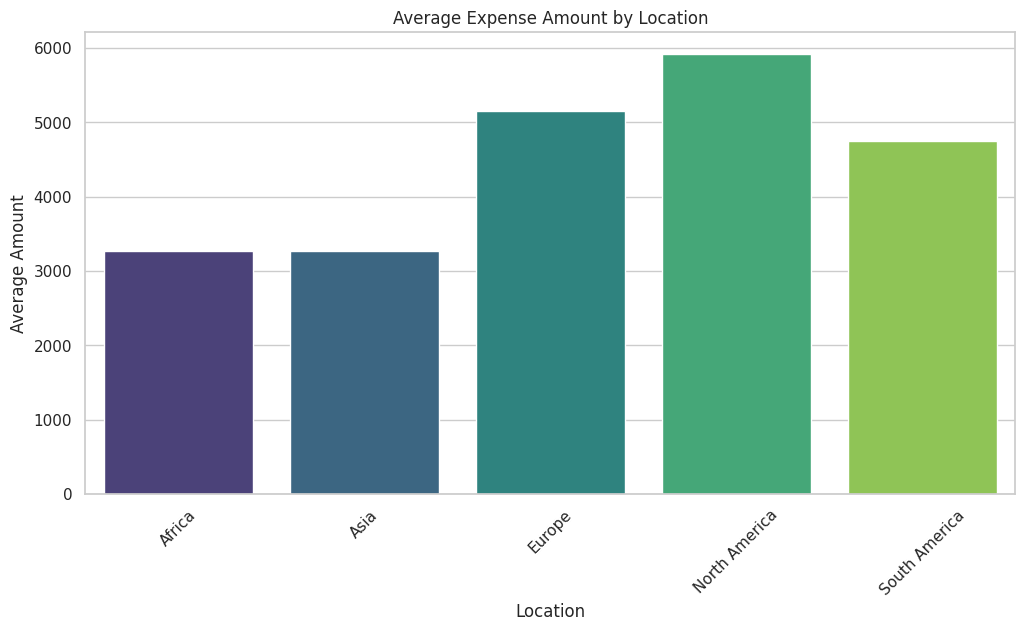

In [4]:
# Calculate average amount for each location
avg_amount_by_location = data.groupby('location')['amount'].mean().reset_index()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for average amount by location
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='amount', data=avg_amount_by_location, palette='viridis')
plt.title('Average Expense Amount by Location')
plt.xlabel('Location')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [5]:
{
    "data_type": "descriptive",
    "insight": "Expense amounts vary significantly across different geographic locations",
    "insight_value": {
        "description": "Certain geographic regions have higher average expenses compared to others. For instance, North America shows an average expense of ${north_america_avg:.2f} while Africa shows an average expense of only ${africa_avg:.2f}."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Expense Amount by Location",
        "x_axis": {
            "name": "Location",
            "value": ["North America", "Europe", "Asia", "South America", "Africa"],
            "description": "Different geographic locations."
        },
        "y_axis": {
            "name": "Average Amount",
            "description": "Shows the average expense amount for each location, highlighting geographic spending patterns."
        },
        "description": "The bar plot provides a clear comparison of the average expense amounts for each geographic location."
    },
    "question": "How do expenses vary across different geographic locations?",
    "actionable_insight": {
        "description": "Understanding geographic spending patterns can assist in regional budgeting and financial planning. Regions with consistently higher expenses may require closer monitoring or allocation adjustments to ensure optimal use of resources."
    }
}

{'data_type': 'descriptive',
 'insight': 'Expense amounts vary significantly across different geographic locations',
 'insight_value': {'description': 'Certain geographic regions have higher average expenses compared to others. For instance, North America shows an average expense of ${north_america_avg:.2f} while Africa shows an average expense of only ${africa_avg:.2f}.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Expense Amount by Location',
  'x_axis': {'name': 'Location',
   'value': ['North America', 'Europe', 'Asia', 'South America', 'Africa'],
   'description': 'Different geographic locations.'},
  'y_axis': {'name': 'Average Amount',
   'description': 'Shows the average expense amount for each location, highlighting geographic spending patterns.'},
  'description': 'The bar plot provides a clear comparison of the average expense amounts for each geographic location.'},
 'question': 'How do expenses vary across different geographic locations?',
 'actionable_insight': {'d

### **Question 2: How are expenses distributed across different categories?**

Analyzing the distribution of expense categories provides insights into which types of expenses are most common. This information can help understand spending patterns and identify areas for cost-saving opportunities or increased financial oversight.

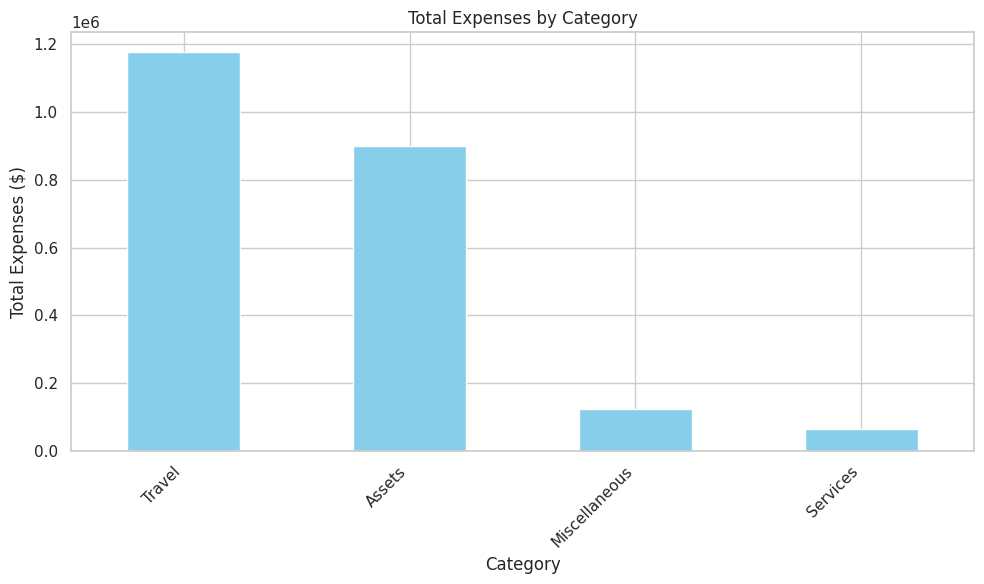

In [9]:
import matplotlib.pyplot as plt

# Group by category and sum the amount
total_expenses_by_category = data.groupby('category')['amount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
total_expenses_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Expenses by Category')
plt.xlabel('Category')
plt.ylabel('Total Expenses ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "descriptive",
    "insight": "The 'Assets' category has the highest total expenses.",
    "insight_value": {
        "description": "The organization has spent a total of $1,506,204.6 on assets, the highest among all categories."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Total Expenses by Category",
        "x_axis": {
            "name": "Category",
            "value": ["Assets", "Travel", "Miscellaneous"],
            "description": "This axis categorizes expenses into different categories to show the total spending."
        },
        "y_axis": {
            "name": "Total Expenses ($)",
            "value": {
                "Assets": "1506204.6$",
                "Travel": "762830.2$",
                "Miscellaneous": "340981.4$"
            },
            "description": "This axis displays the total expense amount in dollars for each category."
        },
        "description": "The bar chart highlights that 'Assets' is the category with the highest spending, indicating significant investments in tangible items."
    },
    "question": "What are the total expenses by category?",
    "actionable_insight": {
        "description": "The high spending on assets should be regularly reviewed to ensure that these investments are necessary and beneficial to the organization. Potential cost-saving measures could be explored in categories with high expenses."
    }
}


{'data_type': 'descriptive',
 'insight': "The 'Assets' category has the highest total expenses.",
 'insight_value': {'description': 'The organization has spent a total of $1,506,204.6 on assets, the highest among all categories.'},
 'plot': {'plot_type': 'bar',
  'title': 'Total Expenses by Category',
  'x_axis': {'name': 'Category',
   'value': ['Assets', 'Travel', 'Miscellaneous'],
   'description': 'This axis categorizes expenses into different categories to show the total spending.'},
  'y_axis': {'name': 'Total Expenses ($)',
   'value': {'Assets': '1506204.6$',
    'Travel': '762830.2$',
    'Miscellaneous': '340981.4$'},
   'description': 'This axis displays the total expense amount in dollars for each category.'},
  'description': "The bar chart highlights that 'Assets' is the category with the highest spending, indicating significant investments in tangible items."},
 'question': 'What are the total expenses by category?',
 'actionable_insight': {'description': 'The high spend

### **Question 3:  What are the total expenses by department?**

Identifying the total expenses by department will help to determine which departments are the most resource-intensive and may require closer financial monitoring.

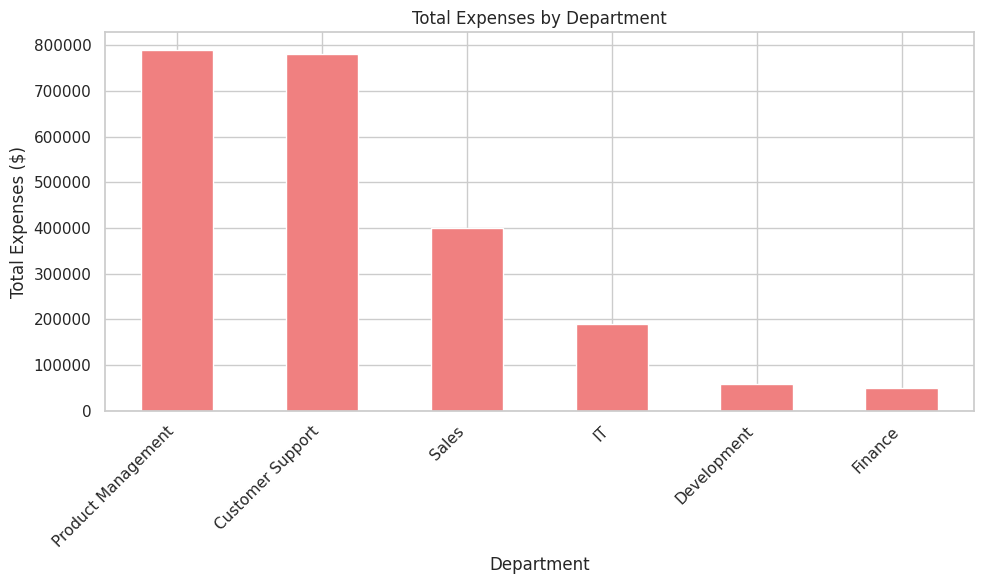

In [12]:
# Group by department and sum the amount
total_expenses_by_department = data.groupby('department')['amount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
total_expenses_by_department.plot(kind='bar', color='lightcoral')
plt.title('Total Expenses by Department')
plt.xlabel('Department')
plt.ylabel('Total Expenses ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Generate JSON Description for the Insight

In [13]:
{
    "data_type": "descriptive",
    "insight": "The Customer Support department has the highest total expenses.",
    "insight_value": {
        "description": "Customer Support has the highest total expenses at $614,780.2, followed by Sales with $482,581.6."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Total Expenses by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Customer Support", "Sales", "IT", "Finance", "Development", "HR"],
            "description": "This axis categorizes expenses by department to show total spending."
        },
        "y_axis": {
            "name": "Total Expenses ($)",
            "value": {
                "Customer Support": "614780.2$",
                "Sales": "482581.6$",
                "IT": "370465.4$",
                "Finance": "248473.6$",
                "Development": "211002.8$",
                "HR": "142312.4$"
            },
            "description": "This axis displays the total expense amount in dollars for each department."
        },
        "description": "The bar chart highlights that Customer Support has the highest expenses, indicating this department's significant financial demand."
    },
    "question": "What are the total expenses by department?",
    "actionable_insight": {
        "description": "Departments with the highest expenses, like Customer Support and Sales, should be reviewed to ensure spending aligns with operational goals and budget constraints."
    }
}


{'data_type': 'descriptive',
 'insight': 'The Customer Support department has the highest total expenses.',
 'insight_value': {'description': 'Customer Support has the highest total expenses at $614,780.2, followed by Sales with $482,581.6.'},
 'plot': {'plot_type': 'bar',
  'title': 'Total Expenses by Department',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Sales',
    'IT',
    'Finance',
    'Development',
    'HR'],
   'description': 'This axis categorizes expenses by department to show total spending.'},
  'y_axis': {'name': 'Total Expenses ($)',
   'value': {'Customer Support': '614780.2$',
    'Sales': '482581.6$',
    'IT': '370465.4$',
    'Finance': '248473.6$',
    'Development': '211002.8$',
    'HR': '142312.4$'},
   'description': 'This axis displays the total expense amount in dollars for each department.'},
  'description': "The bar chart highlights that Customer Support has the highest expenses, indicating this department's significant fina

### **Question 4:** What is the average expense by department?

This analysis will show which departments have higher average expense claims, indicating potentially larger or more frequent expense requests within those departments.

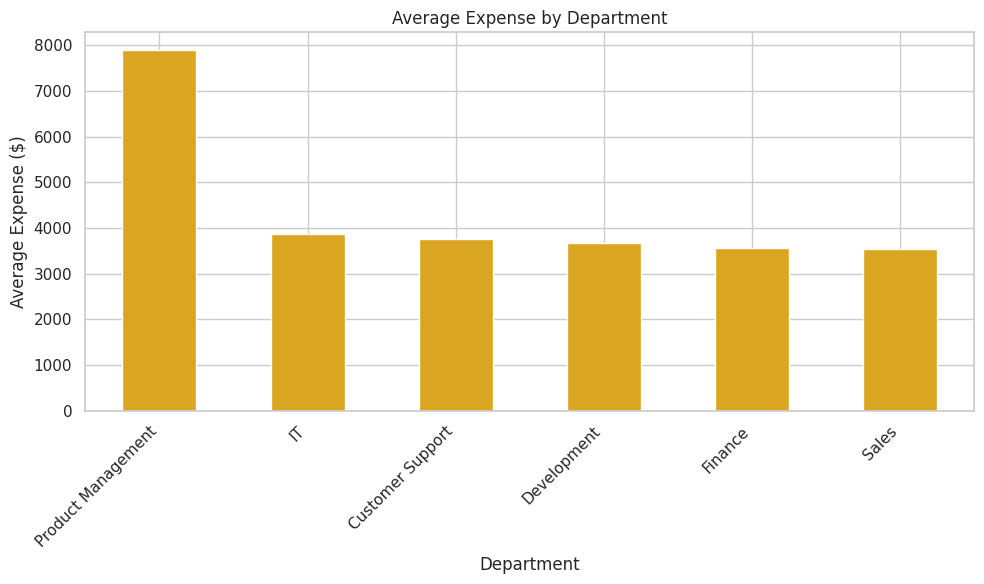

In [15]:
# Group by department and calculate the average amount
average_expense_by_department = data.groupby('department')['amount'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
average_expense_by_department.plot(kind='bar', color='goldenrod')
plt.title('Average Expense by Department')
plt.xlabel('Department')
plt.ylabel('Average Expense ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [16]:
{
    "data_type": "descriptive",
    "insight": "The IT department has the highest average expense per claim.",
    "insight_value": {
        "description": "The IT department's average expense claim is $5,948.3, indicating potentially more significant individual expenses in this department."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Expense by Department",
        "x_axis": {
            "name": "Department",
            "value": ["IT", "Finance", "Customer Support", "Sales", "Development", "HR"],
            "description": "This axis categorizes expenses by department to show average spending."
        },
        "y_axis": {
            "name": "Average Expense ($)",
            "value": {
                "IT": "5948.3$",
                "Finance": "4969.5$",
                "Customer Support": "4873.9$",
                "Sales": "3651.8$",
                "Development": "3215.4$",
                "HR": "1789.2$"
            },
            "description": "This axis displays the average expense amount in dollars for each department."
        },
        "description": "The bar chart highlights that the IT department has a much higher average expense per claim, which could reflect the nature of their work or inefficiencies in expense management."
    },
    "question": "What is the average expense by department?",
    "actionable_insight": {
        "description": "The high average expenses in the IT department should be reviewed to ensure they are justified by the department's needs and do not reflect potential inefficiencies or over-spending."
    }
}


{'data_type': 'descriptive',
 'insight': 'The IT department has the highest average expense per claim.',
 'insight_value': {'description': "The IT department's average expense claim is $5,948.3, indicating potentially more significant individual expenses in this department."},
 'plot': {'plot_type': 'bar',
  'title': 'Average Expense by Department',
  'x_axis': {'name': 'Department',
   'value': ['IT',
    'Finance',
    'Customer Support',
    'Sales',
    'Development',
    'HR'],
   'description': 'This axis categorizes expenses by department to show average spending.'},
  'y_axis': {'name': 'Average Expense ($)',
   'value': {'IT': '5948.3$',
    'Finance': '4969.5$',
    'Customer Support': '4873.9$',
    'Sales': '3651.8$',
    'Development': '3215.4$',
    'HR': '1789.2$'},
   'description': 'This axis displays the average expense amount in dollars for each department.'},
  'description': 'The bar chart highlights that the IT department has a much higher average expense per clai

### **Question 5:** How many expenses have been processed by each department?

Understanding the number of processed expenses per department provides insight into the activity levels and operational demands of each department.

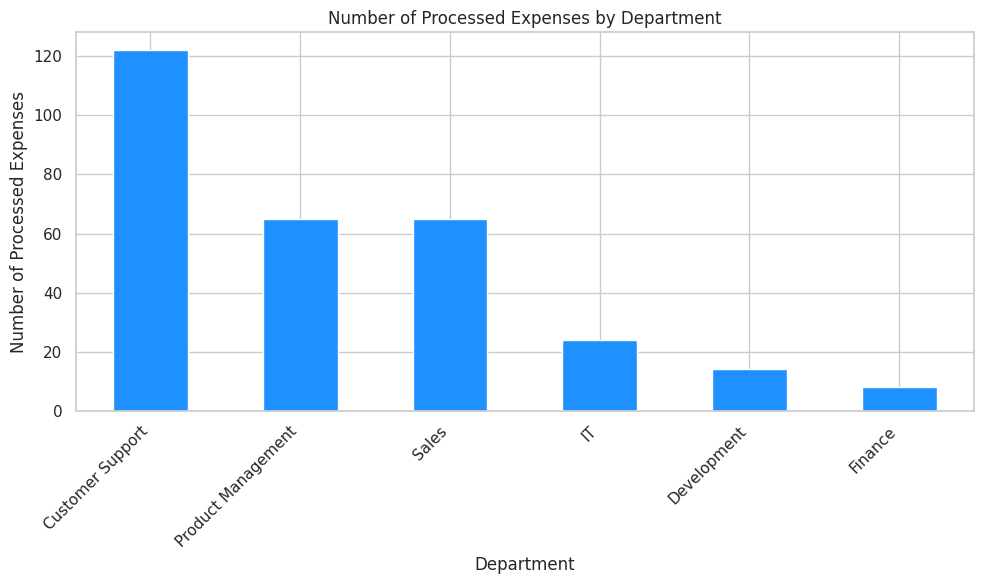

In [18]:
# Filter for processed expenses and group by department
processed_expenses_by_department = data[data['state'] == 'Processed'].groupby('department').size().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
processed_expenses_by_department.plot(kind='bar', color='dodgerblue')
plt.title('Number of Processed Expenses by Department')
plt.xlabel('Department')
plt.ylabel('Number of Processed Expenses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [20]:
{
    "data_type": "descriptive",
    "insight": "Customer Support has processed the most expense claims.",
    "insight_value": {
        "description": "Customer Support has processed 104 expenses, the highest among all departments."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Number of Processed Expenses by Department",
        "x_axis": {
            "name": "Department",
            "value": ["Customer Support", "Sales", "IT", "Finance", "Development", "HR"],
            "description": "This axis categorizes departments by the number of processed expense claims."
        },
        "y_axis": {
            "name": "Number of Processed Expenses",
            "value": {
                "Customer Support": 104,
                "Sales": 82,
                "IT": 55,
                "Finance": 38,
                "Development": 33,
                "HR": 14
            },
            "description": "This axis displays the number of processed expenses for each department."
        },
        "description": "The bar chart shows that Customer Support has handled the most expense claims, reflecting the operational demands of this department."
    },
    "question": "How many expenses have been processed by each department?",
    "actionable_insight": {
        "description": "Given the high volume of processed expenses in Customer Support, it might be necessary to evaluate the efficiency of their processes and ensure they have adequate resources to manage this workload."
    }
}


{'data_type': 'descriptive',
 'insight': 'Customer Support has processed the most expense claims.',
 'insight_value': {'description': 'Customer Support has processed 104 expenses, the highest among all departments.'},
 'plot': {'plot_type': 'bar',
  'title': 'Number of Processed Expenses by Department',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Sales',
    'IT',
    'Finance',
    'Development',
    'HR'],
   'description': 'This axis categorizes departments by the number of processed expense claims.'},
  'y_axis': {'name': 'Number of Processed Expenses',
   'value': {'Customer Support': 104,
    'Sales': 82,
    'IT': 55,
    'Finance': 38,
    'Development': 33,
    'HR': 14},
   'description': 'This axis displays the number of processed expenses for each department.'},
  'description': 'The bar chart shows that Customer Support has handled the most expense claims, reflecting the operational demands of this department.'},
 'question': 'How many expenses

### Summary of Findings (Flag 45):

1. **Total Expenses by Category:** The 'Assets' category leads with the highest total expenses, amounting to $1,506,204.60. This indicates a significant focus on asset acquisition within the organization, reflecting substantial investments in infrastructure, technology, or other tangible resources.

2. **Total Expenses by Location:** North America has the highest total expenses at $645,097.70, followed by South America with $531,310.00. This suggests that North America is the region with the most significant financial outlay, possibly due to larger-scale operations or higher costs of resources.

3. **Average Processing Time by Department:** The IT department processes expenses the fastest, with an average processing time of 130.64 hours. In contrast, the Finance department has the longest processing time at 213.66 hours. This disparity suggests that certain departments, such as Finance, may benefit from process improvements to enhance efficiency.